<a href="https://colab.research.google.com/github/mariafelecann/LicentaAI/blob/dataPreprocessingComplete/data_preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Data Preprocessing

In [2]:
!pip install pandas scikit-learn spacy imbalanced-learn nrclex numpy

INFO: pip is looking at multiple versions of nrclex to determine which version is compatible with other requirements. This could take a while.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 396.4/396.4 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nrclex: filename=NRCLex-3.0.0-py3-none-any.whl size=43308 sha256=d5d6fd12711ed3a4871124e645608261321b8530b305322c59ef1772951f2260
  Stored in directory: /root/.cache/pip/wheels/ed/ac/fa/7afddefd14f51c4a963ed291b9052746ed3929473e5a33118d
Successfully built nrclex


In [3]:
!python -m spacy download ro_core_news_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 11.8 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('ro_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [4]:
import pandas as pd
import numpy as np
import re
import spacy
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.over_sampling import SMOTE
from nrclex import NRCLex

Transforming the original lyrics for a better representation:

In [7]:
df = pd.read_csv("/content/romanian_music_filtered.csv")
print()
print("original lyrics")
print(df[['lyrics']].head())
print()

df = df.drop_duplicates().dropna()
print()
print("after dropping duplicates and na")
print(df[['lyrics']].head())
print()

df['lyrics'] = df['lyrics'].str.lower()
df['lyrics'] = df['lyrics'].apply(lambda x: re.sub(r'[^a-zăâîșțA-ZĂÂÎȘȚ \n]', '', x))
# df['lyrics'] = df['lyrics'].apply(lambda x: re.sub(r'\n', ' \n ', x))

df['lyrics_cleaned'] = df['lyrics']
df['lyrics_cleaned'] = df['lyrics_cleaned'].apply(lambda x: re.sub(r"\[.*?\]", "", x))
print("after making the lyrics lowercase, eliminating symbols and punctuation signs")
pd.set_option('display.max_colwidth', None)
print(df[['lyrics_cleaned']].head())
print()

df['lyrics_cleaned'] = df['lyrics_cleaned'].str.replace("\n", " ")
print("after replacing newline")
pd.set_option('display.max_colwidth', None)
print(df[['lyrics_cleaned']].head())

df['lyrics_cleaned'] = df['lyrics_cleaned'].apply(lambda x: re.sub(r"\[.*?\]|\(bis\s*x\d+\)", "", x))
df['lyrics_cleaned'] = df['lyrics_cleaned'].str.replace("bis x", "")
df['lyrics_cleaned'] = df['lyrics_cleaned'].str.replace("refren", "")
df['lyrics_cleaned'] = df['lyrics_cleaned'].str.replace("verse", "")
df['lyrics_cleaned'] = df['lyrics_cleaned'].str.replace("intro", "")
df['lyrics_cleaned'] = df['lyrics_cleaned'].str.replace("chorus", "")
df['lyrics_cleaned'] = df['lyrics_cleaned'].str.replace("versuri", "")
df['lyrics_cleaned'] = df['lyrics_cleaned'].str.replace("strofa", "")
df['lyrics_cleaned'] = df['lyrics_cleaned'].str.replace("punte", "")
print()
print("after replacing lyrics separator words")
pd.set_option('display.max_colwidth', None)
print(df[['lyrics_cleaned']].head())

print()


original lyrics
                                              lyrics
0  Foaie verde ca lipanul,\nFoaie verde ca lipanu...
1  Poți să-ți alegi un loc în lume,\nSă-ți trăieș...
2  Măi bărbate fii cuminte,\nMăi bărbate fii cumi...
3  Frunzuliță iasomie,\nAstă horă-mi place mie. (...
4  Eu-s în deal și badea-n șesu.\nEu-s în deal și...


after dropping duplicates and na
                                              lyrics
0  Foaie verde ca lipanul,\nFoaie verde ca lipanu...
1  Poți să-ți alegi un loc în lume,\nSă-ți trăieș...
2  Măi bărbate fii cuminte,\nMăi bărbate fii cumi...
3  Frunzuliță iasomie,\nAstă horă-mi place mie. (...
4  Eu-s în deal și badea-n șesu.\nEu-s în deal și...

after making the lyrics lowercase, eliminating symbols and punctuation signs
                                                                                                                                                                                                                                          

Printing some random lyrics from the dataset in order to check for any mistakes:

In [11]:
pd.set_option('display.max_colwidth', None)
print(df[['lyrics_cleaned']].sample(5))

Using spacy to remove stop words and to identify parts of speech for each song:

In [14]:
from collections import Counter
nlp = spacy.load("ro_core_news_sm")

stopwords = nlp.Defaults.stop_words
df['lyrics_cleaned'] = df['lyrics_cleaned'].apply(lambda x: ' '.join([word for word in x.split() if word not in stopwords]))
print()
print("lyrics after removing stopwords")
pd.set_option('display.max_colwidth', None)
print(df[['lyrics_cleaned']].head())
#df['lyrics_cleaned'] = df['lyrics_cleaned'].apply(lambda x: ' '.join([token.lemma_ for token in nlp(x)]))
#print()
# df = df[df['lyrics_cleaned'].str.split().str.len() > 5]

def get_pos_distribution(text):
    doc = nlp(text)
    pos_counts = Counter([token.pos_ for token in doc])
    total_words = len(doc)
    pos_features = {pos: count / total_words if total_words > 0 else 0 for pos, count in pos_counts.items()}
    return pos_features

df_pos_features = df['lyrics_cleaned'].apply(get_pos_distribution).apply(pd.Series)
df = pd.concat([df, df_pos_features], axis=1)

print(df.head())






lyrics after removing stopwords
                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                           lyrics_cleaned
0                                                                                                                            

Displaying random data from the set:

In [16]:
pd.set_option('display.max_colwidth', None)
print(df.sample(5))


                title  tag                   artist  \
7735  Stele căzătoare  pop             Andreea Blan   
8315       Baby Xanny  pop    Afterparty & Dany Coc   
2649             GANG  rap  Vlad Munteanu (Vlogger)   
463        Apus Ep. 9  rap            Criss Blaziny   
5762               Tu  pop     Oana Radu & Dr. Mako   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                             

## Bag of words representation

Now I want to observe the most important words from the lyrics.

`X` will be a matrix: each row represents a song and each column represents a word.

In [26]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['lyrics_cleaned'])
words = vectorizer.get_feature_names_out()
# for i, word in enumerate(words):
#     print(f"{i+1}. {word}")
print("shape of matrix X : " )
print( X.shape)
X_dense = X.toarray()
for i in range(5):
    print(f"Song {i+1}:")
    row = X_dense[i]
    non_zero_indices = row.nonzero()[0]
    words = vectorizer.get_feature_names_out()
    for idx in non_zero_indices[:10]:
        print(f"{words[idx]}: {row[idx]}")
    print("\n")

shape of matrix X : 
(8844, 106461)
Song 1:
cal: 4
calul: 1
calului: 1
casan: 1
deal: 4
dealul: 3
dealuri: 1
des: 1
doamne: 4
duc: 5


Song 2:
alege: 2
alegi: 1
bun: 4
casa: 2
casă: 1
ceți: 1
crede: 1
crește: 1
creștinește: 1
cântec: 1


Song 3:
bărbate: 2
băut: 2
cap: 2
cuminte: 2
cânepa: 2
doare: 2
duminicăi: 4
făcut: 4
ghioace: 2
horăn: 4


Song 4:
acasă: 1
altă: 1
astă: 1
babele: 1
can: 1
cobzare: 1
cântă: 1
căi: 1
drag: 2
facă: 1


Song 5:
altun: 2
amestecatu: 2
bade: 2
badean: 2
badeo: 2
bădițo: 2
cunosc: 2
deal: 2
dragoste: 2
eus: 2




Now we train a LogisticRegression model to predict the genre:

In [27]:
from sklearn.linear_model import LogisticRegression

clf = LogisticRegression(max_iter=1000, solver='lbfgs', multi_class='multinomial')
clf.fit(X, df['tag'])


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(max_iter=1000, multi_class='multinomial')

importance=max(
​
 weight(word, genre
i
​
 ) - weight(word, genre
j
​
 )
​)


In [30]:
word_weights = clf.coef_
importance_scores = np.max(np.abs(word_weights[:, None] - word_weights[None, :]), axis=(0,1))
print("first 5 word_weights:")
print(word_weights[:5])

print("\nfirst 5 importance scores:")
print(importance_scores[:5])


first 5 word_weights:
[[-2.22379918e-02 -5.64931624e-03 -2.59663582e-03 ... -4.42075785e-05
  -4.02494535e-05 -1.81494715e-06]
 [-1.44731799e-01 -8.00359370e-03  3.83345366e-02 ... -6.77088019e-04
  -9.09681536e-05 -1.93141622e-06]
 [-2.48918408e-02 -6.46964073e-03 -2.77234651e-03 ... -4.96546927e-05
  -4.05366057e-05 -1.81572102e-06]
 [ 1.73832082e-01 -5.07705952e-02 -1.37292931e-02 ... -1.20456789e-04
  -6.07089665e-05 -1.85312465e-06]
 [ 4.03488737e-01  3.05427803e-03 -3.41988983e-02 ... -6.65028566e-03
  -1.60334957e-04 -1.49404388e-05]]

first 5 importance scores:
[0.62315113 0.14003866 0.2170376  0.34688803 0.15097965]


In [32]:
threshold = np.percentile(importance_scores, 90)
important_words = np.array(words)[importance_scores > threshold]
filtered_vectorizer = CountVectorizer(vocabulary=important_words)
X_filtered = filtered_vectorizer.fit_transform(df['lyrics_cleaned'])


Visualizing the data:

In [41]:
!pip install wordcloud

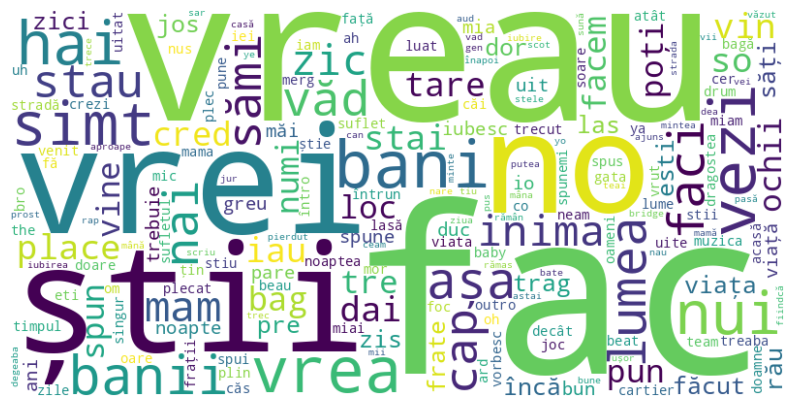

In [48]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

word_freq = dict(zip(filtered_vectorizer.get_feature_names_out(), X_filtered.sum(axis=0).A1))

filtered_word_freq = {word: freq for word, freq in word_freq.items() if word not in exclude_words}

wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_word_freq)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()


## Number of lines and line length

In [ ]:
df['line_lengths'] = df['lyrics_cleaned'].apply(lambda x: np.mean([len(line.split()) for line in x.split('\n')]))
df['num_lines'] = df['lyrics_cleaned'].apply(lambda x: len(x.split('\n')))

## Putting it all together

In [53]:
import spacy
import pandas as pd
import numpy as np
from collections import Counter
from scipy.sparse import hstack, csr_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer

pos_vocabulary = ['NOUN', 'VERB', 'ADJ', 'ADV']
X_pos = csr_matrix(df[pos_vocabulary].values)

df['line_lengths'] = df['lyrics_cleaned'].apply(lambda x: np.mean([len(word) for word in x.split()]))
df['num_lines'] = df['lyrics_cleaned'].apply(lambda x: len(x.split('\n')))

line_lengths_num_lines = csr_matrix(df[['line_lengths', 'num_lines']].values)

X_final = hstack([X_filtered, X_pos, line_lengths_num_lines])

## Downloading data

In [ ]:
df_cleaned = df[['lyrics_cleaned']]

df_cleaned.to_csv("romanian_music_cleaned_only_lyrics.csv", index=False, encoding="utf-8")



In [ ]:
from google.colab import files
files.download("romanian_music_cleaned_only_lyrics.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
df_cleaned_all = df[['id', 'title', 'artist', 'tag', 'lyrics_cleaned']]

df_cleaned_all.to_csv("romanian_music_cleaned_with_metadata.csv", index=False, encoding="utf-8")


In [ ]:
from google.colab import files
files.download("romanian_music_cleaned_with_metadata.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [60]:
import pandas as pd
from scipy.sparse import hstack

X_dense = X_final.toarray()

pos_columns = ['NOUN', 'VERB', 'ADJ', 'ADV']
additional_columns = ['line_lengths', 'num_lines']
num_word_features = X_dense.shape[1] - len(pos_columns) - len(additional_columns)

words_columns = [f'feature_{i}' for i in range(num_word_features)]


all_columns = words_columns + pos_columns + additional_columns

df_features = pd.DataFrame(X_dense, columns=all_columns)
df_features = df_features.drop(columns=[col for col in df_features.columns if col.startswith('feature_')])
df_final = pd.concat([df[['id', 'artist', 'title', 'tag', 'lyrics_cleaned']], df_features], axis=1)

df_final.head()

,id,artist,title,tag,lyrics_cleaned,NOUN,VERB,ADJ,ADV,line_lengths,num_lines
0,1.0,Arsenie Botnaru,"Ţine, Doamne, vara lungă",country,foaie verde lipanul foaie verde lipanul ofof păscumi calul leana urc mândra dealul leano ine doamne vara lungă paralen pungă sămi pun șaua cal duc mândran deal urcai dealul jumătate urcai dealul jumătate ofof pierdui potcoavele leana pierdui potcoavele leano ine doamne vara lungă paralen pungă sămi pun șaua cal duc mândran deal vina calului măi potcovarului ofof vina mândrei leana pus casan dealuri grele leano ine doamne vara lungă paralen pungă sămi pun șaua cal duc mândran deal vina măi vina ofof vina măi leana des duc măi leano ine doamne vara lungă paralen pungă sămi pun șaua cal duc mândran deal,0.475728,0.029126,0.233010,0.048544,4.902913,1.0
1,2.0,Marin Ganciu și Surorile Osoianu,Vecinul bun,country,poți săți alegi loc lume săți trăiești viața părinții vecinii nui alege nimenea părinții vecinii nui alege nimenea poți palat casă fântâna drum viața frumoasă nai vecinul bun viața frumoasă nai vecinul bun omule străin vecin turna pelin măi sănchinăm vin om poartă sădește nai invidie fir hărnicia unește sădești trandafir hărnicia unește sădești trandafir omul crește rodește trandafirul miroși omenia dăinuiește vecinii frumoși omenia dăinuiește vecinii frumoși omule străin vecin turna pelin măi sănchinăm vin viața frumoasă crede omule ceți spun luminăi plină casa vecinul bun luminăi plină casa vecinul bun nevoi pasă creștinește faceți sărbători masă vecinul loc omule străin vecin turna pelin măi sănchinăm vin final omule străin frații întâlin măi viață trăim petre popa petre popa menționează cântec popular simplu menționăm drag,0.468254,0.039683,0.253968,0.007937,5.658730,1.0
2,3.0,Maria Țâră,Măi bărbate fii cuminte,country,măi bărbate cuminte măi bărbate cuminte cânepa mio vinde cânepa mio vinde mio vinde preț măi mio vinde preț măi lunea lucrez lunea lucrez măi marți sărbătoare marți sărbătoare miercuri iaca doare miercuri iaca doare joi ziua ghioace joi ziua ghioace vineri nică vineri nică sâmbătă spăl cap măi sâmbătă spăl cap măi duminicăi horăn sat duminicăi horăn sat măi duminicăi horăn sat măi duminicăi horăn sat măi băut mâncat băut mâncat măi săptămâna trecut măi săptămâna trecut măi nică nam făcut nică nam făcut măi nică nam făcut nică nam făcut,0.402174,0.086957,0.347826,0.032609,4.891304,1.0
3,4.0,Opincuța,Astă horă-mi place mie,country,frunzuliță iasomie astă horămi place micuță jucat muma mo învățat joacă penserat fiindcăi sărbătoaren sat cântă fete sprâncenate flăcăi sate zii cobzare zii foc drag intrăm joc zii scripcare zii foc drag intrăm joc hora facă roată can hora altă moșnegii lasă strigă babele acasă vină hora haine sărbătoare căi horă moldovenească lumea poftească,0.370370,0.148148,0.314815,0.037037,5.388889,1.0
4,5.0,Unknown Artist,Purtata fetelor (cântec și dans popular din Transilvania),country,eus deal badean șesu eus deal badean șesu mil cunosc mersu mil cunosc mersu mere gândești scrie mere gândești scrie țăruza hârtie țăruza hârtie mersu legănatu mersu legănatu dragoste amestecatu dragoste amestecatu badeo spiculeț grâu badeo spiculeț grâu vrut vrut numi trebuie altun lume numi trebuie altun lume bădițo bădițo bade bade,0.307692,0.115385,0.346154,0.019231,5.461538,1.0


In [61]:
df_final.to_csv('/content/music_preprocessed_extended.csv', index=False)

from google.colab import files
files.download('/content/music_preprocessed_extended.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>